##Adınız:  Alperen Akyıldız    
##Okul Numaranız:  2312721060   
##GitHub Repo Bağlantısı:

## Problem Tanımı

Bir Sağlık Bakanlığı ekibi, Isparta ili kırsalında bulunan 15 köyde
çocuklara aşı yapmakla görevlendirilmiştir.

Ekip:
- Isparta İl Merkezi’nden yola çıkmakta,
- Tüm köyleri yalnızca bir kez ziyaret etmekte,
- Görev sonunda tekrar Isparta İl Merkezi’ne dönmektedir.

Amaç, toplam yol mesafesini minimize eden en kısa rotanın belirlenmesidir.


## Kullanılan Kütüphaneler

Bu çalışmada Google Maps API, Haversine formülü ve
Ant Colony Optimization algoritması kullanılmıştır.


In [1]:
!pip install googlemaps folium


  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40714 sha256=8f007ef4fa5d3e211ae84edb993c581310b72913e3b6e1d8710633a4ea43e4f0
  Stored in directory: /root/.cache/pip/wheels/4c/6a/a7/bbc6f5c200032025ee655deb5e163ce8594fa05e67d973aad6
Successfully built googlemaps


In [23]:
import googlemaps
import numpy as np
import math
import matplotlib.pyplot as plt
import folium

import pandas as pd

## Merkez ve Köy Bilgileri

Isparta İl Merkezi başlangıç ve bitiş noktası olarak belirlenmiştir.
Köylerin koordinatları Google Maps API kullanılarak otomatik alınacaktır.


In [24]:
API_KEY = "YOUR KEY HERE"
gmaps = googlemaps.Client(key=API_KEY)

locations = [
    {"name": "Isparta Merkez", "query": "Isparta Valiliği, Isparta"},

    {"name": "Sav", "query":"Sav Köyü, Isparta Merkez"},
    {"name": "Kuleönü", "query":"Kuleönü Köyü, Isparta Merkez"},
    {"name": "Deregümü", "query":"Deregümü Köyü, Isparta Merkez"},
    {"name": "Çobanisa", "query":"Çobanisa Köyü, Isparta Merkez"},
    {"name": "Senirce", "query":"Senirce Köyü, Isparta Merkez"},
    {"name": "Yakaören", "query":"Yakaören Köyü, Isparta Merkez"},
    {"name": "Ayazmana", "query":"Ayazmana Köyü, Isparta Merkez"},
    {"name": "Küçük Hacılar", "query":"Küçük Hacılar Köyü, Isparta Merkez"},
    {"name": "Büyük Gökçeli", "query":"Büyük Gökçeli, Isparta Merkez"},
    {"name":"Bozanönü", "query":"Bozanönü Köyü, Isparta Merkez"},
    {"name": "Darı Deresi", "query":"Darı Deresi, Isparta Merkez"},
    {"name": "Direkli", "query":"Direkli Köyü, Isparta Merkez"},
    {"name": "Gelincik", "query":"Gelincik, Isparta Merkez"},
    {"name": "Aliköy", "query":"Aliköy Köyü, Isparta Merkez"},
    {"name": "Yukarıgökdere", "query":"Yukarıgökdere, Isparta Merkez"},
]


## Google Maps API ile Koordinatların Alınması

Köy isimleri Google Maps Geocoding servisi kullanılarak
enlem ve boylam bilgilerine dönüştürülmüştür.


In [25]:
def get_coordinates(address):
    result = gmaps.geocode(address)
    if not result:
        raise ValueError(f"Koordinat bulunamadı: {address}")
    loc = result[0]["geometry"]["location"]
    return loc["lat"], loc["lng"]


coords = []
for loc in locations:
    lat, lng = get_coordinates(loc["query"])
    coords.append((lat, lng))


## Haversine Mesafe Hesabı

Haversine formülü kullanılarak iki nokta arasındaki
küresel mesafe kilometre cinsinden hesaplanmıştır ve aşağıdaki tabloda kilometre cinsinden gösterilmiştir.





In [26]:
def haversine(coord1, coord2):
    R = 6371
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2)**2 + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2)**2
    return R * 2 * math.asin(math.sqrt(a))

n = len(coords)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        distance_matrix[i][j] = haversine(coords[i], coords[j])


names = [loc["name"] for loc in locations]
df_distance = pd.DataFrame(
    distance_matrix,
    index=names,
    columns=names
)

df_distance.round(2)



,Isparta Merkez,Sav,Kuleönü,Deregümü,Çobanisa,Senirce,Yakaören,Ayazmana,Küçük Hacılar,Büyük Gökçeli,Bozanönü,Darı Deresi,Direkli,Gelincik,Aliköy,Yukarıgökdere
Isparta Merkez,0.00,7.53,13.33,4.85,16.76,14.58,6.85,3.37,8.39,19.76,10.91,5.13,7.14,10.09,7.88,27.32
Sav,7.53,0.00,12.18,11.90,10.00,17.54,14.20,5.17,4.90,14.58,12.64,7.93,5.31,17.51,5.09,20.27
Kuleönü,13.33,12.18,0.00,13.58,11.91,8.57,15.74,14.32,7.28,9.87,4.79,17.55,16.86,21.14,7.15,28.71
Deregümü,4.85,11.90,13.58,0.00,20.07,11.83,2.49,8.22,11.14,21.84,9.71,9.32,11.95,7.57,10.49,32.02
Çobanisa,16.76,10.00,11.91,20.07,0.00,20.27,22.56,15.09,8.97,6.50,15.59,17.92,14.82,26.80,9.63,17.28
Senirce,14.58,17.54,8.57,11.83,20.27,0.00,12.87,17.16,13.35,18.25,5.03,19.70,20.70,18.17,12.85,36.43
Yakaören,6.85,14.20,15.74,2.49,22.56,12.87,0.00,10.12,13.63,24.27,11.57,10.57,13.67,5.51,12.98,34.17
Ayazmana,3.37,5.17,14.32,8.22,15.09,17.16,10.12,0.00,7.95,19.08,12.93,3.31,3.81,12.58,7.68,24.13
Küçük Hacılar,8.39,4.90,7.28,11.14,8.97,13.35,13.63,7.95,0.00,11.39,8.33,11.25,9.79,18.13,0.67,23.24
Büyük Gökçeli,19.76,14.58,9.87,21.84,6.50,18.25,24.27,19.08,11.39,0.00,14.57,22.27,19.85,29.23,11.88,22.91


## Ant Colony Optimization Algoritması

Gezgin Satıcı Problemi (TSP), Ant Colony Optimization (ACO)
algoritması kullanılarak çözülmüştür.


In [27]:
class AntColony:
    def __init__(self, dist, n_ants=20, n_iter=100, alpha=1, beta=5, rho=0.5, Q=100):
        self.dist = dist
        self.n = dist.shape[0]
        self.n_ants = n_ants
        self.n_iter = n_iter
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.Q = Q

    def run(self):
        pheromone = np.ones((self.n, self.n))
        visibility = 1 / (self.dist + 1e-10)
        best_len = float("inf")
        best_tour = None
        history = []

        for _ in range(self.n_iter):
            lengths = []
            tours = []
            for _ in range(self.n_ants):
                tour = [0]
                unvisited = list(range(1, self.n))
                while unvisited:
                    i = tour[-1]
                    probs = [(pheromone[i][j]**self.alpha)*(visibility[i][j]**self.beta) for j in unvisited]
                    probs = probs / np.sum(probs)
                    next_city = np.random.choice(unvisited, p=probs)
                    tour.append(next_city)
                    unvisited.remove(next_city)
                length = sum(self.dist[tour[i]][tour[(i+1)%self.n]] for i in range(self.n))
                tours.append(tour)
                lengths.append(length)

                if length < best_len:
                    best_len = length
                    best_tour = tour

            history.append(min(lengths))
            pheromone *= (1-self.rho)
            for tour, L in zip(tours, lengths):
                for i in range(self.n):
                    pheromone[tour[i]][tour[(i+1)%self.n]] += self.Q/L

        return best_tour, best_len, history


## Algoritmanın Çalıştırılması


In [28]:
aco = AntColony(distance_matrix)
best_tour, best_length, history = aco.run()

print("En kısa rota:")
for i in best_tour:
    print(locations[i]["name"])

print(f"\nToplam Mesafe: {best_length:.2f} km")


En kısa rota:
Isparta Merkez
Deregümü
Yakaören
Gelincik
Darı Deresi
Direkli
Sav
Aliköy
Küçük Hacılar
Kuleönü
Bozanönü
Senirce
Büyük Gökçeli
Çobanisa
Yukarıgökdere
Ayazmana

Toplam Mesafe: 125.99 km


## Yakınsama Grafiği


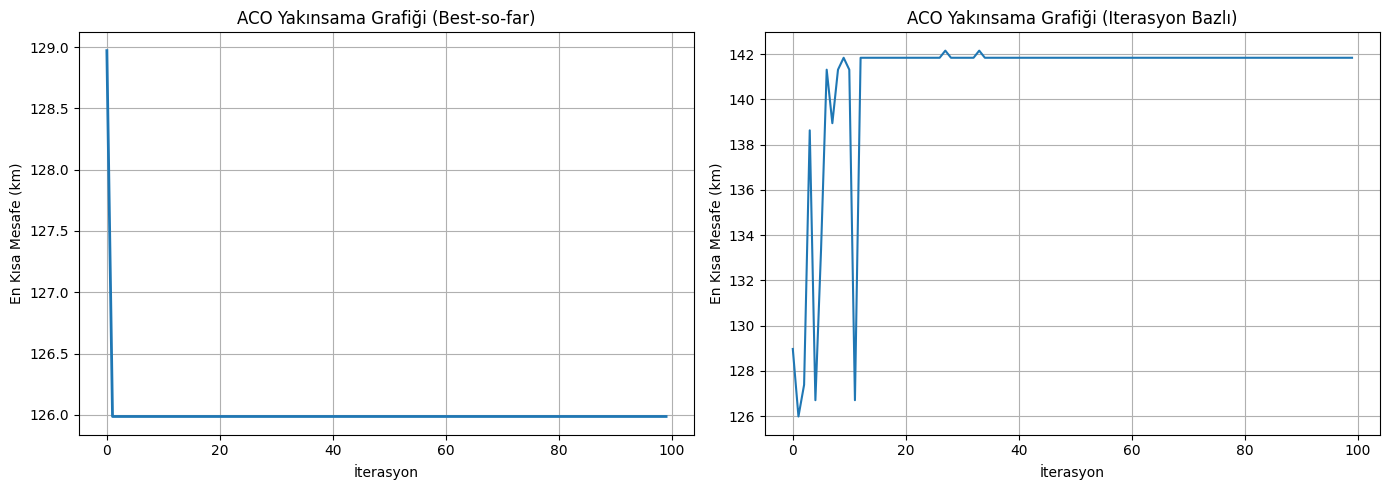

In [35]:
best_so_far = np.minimum.accumulate(history)

plt.figure(figsize=(14,5))

# Sol grafik: Best-so-far
plt.subplot(1, 2, 1)
plt.plot(best_so_far, linewidth=2)
plt.xlabel("İterasyon")
plt.ylabel("En Kısa Mesafe (km)")
plt.title("ACO Yakınsama Grafiği (Best-so-far)")
plt.grid(True)

# Sağ grafik: Her iterasyondaki en iyi
plt.subplot(1, 2, 2)
plt.plot(history)
plt.xlabel("İterasyon")
plt.ylabel("En Kısa Mesafe (km)")
plt.title("ACO Yakınsama Grafiği (Iterasyon Bazlı)")
plt.grid(True)

plt.tight_layout()
plt.show()


## Rota Görselleştirme


In [32]:
m = folium.Map(location=coords[0], zoom_start=11)

for idx in best_tour:
    folium.Marker(coords[idx], popup=locations[idx]["name"]).add_to(m)

for i in range(len(best_tour)):
    a = coords[best_tour[i]]
    b = coords[best_tour[(i+1)%len(best_tour)]]
    folium.PolyLine([a, b]).add_to(m)

m


## Toplam Mesafe ve İyileştirme Oranı

ACO algoritmasının başlangıç çözümüne göre sağladığı
iyileştirme oranı hesaplanmıştır.


In [33]:
# Başlangıç çözümü: sıralı rota (0 → 1 → 2 → ... → 0)
initial_tour = list(range(len(locations)))

def tour_length(tour, dist):
    return sum(dist[tour[i]][tour[(i+1) % len(tour)]] for i in range(len(tour)))

initial_distance = tour_length(initial_tour, distance_matrix)

improvement_rate = ((initial_distance - best_length) / initial_distance) * 100

print(f"Başlangıç Toplam Mesafe: {initial_distance:.2f} km")
print(f"ACO ile Bulunan En Kısa Mesafe: {best_length:.2f} km")
print(f"İyileştirme Oranı: %{improvement_rate:.2f}")


Başlangıç Toplam Mesafe: 234.30 km
ACO ile Bulunan En Kısa Mesafe: 125.99 km
İyileştirme Oranı: %46.23
